In [6]:
import numpy as np
import matplotlib.pyplot as plt

The Ridge loss function is defined as:

$$E(w) = 0.5\sum_{n=1}^N (w^Tx_n - y_n )^2 + \lambda \sum_{j=1}^d w_j^2$$

Therefore, the gradient is:

$$\nabla E(w) = \sum_{n=1}^N (w^Tx_n - y_n )x_n + 2\lambda \sum_{j=1}^d w_j$$

In [23]:
def ridge_loss(X, y, weights, ridge):
    return 0.5*np.sum((np.dot(X,weights) - y) ** 2) + ridge * np.sum(weights ** 2) #check last part

def ridge_grad(X, y, weights, ridge):
    return 2 * ridge * weights +  np.dot(X.T, np.dot(X, weights) - y)

def compute_step(X, y, weights, ridge, lr):
    gradient = ridge_grad(X, y, weights, ridge)
    step = lr * gradient / len(y)
    return step


In [31]:
# Toy example
X = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([1, 2])
weights = np.array([1, 2, 3]) # initial weights 

for i in range(10):
    print(ridge_loss(X, y, weights, 0.01))
    weights = weights - compute_step(X, y, weights, 0.1, 0.01)

534.64
159.98500084
47.90609180845383
14.38110777323929
4.354989571662672
1.3573990453097413
0.4615024560559088
0.19376520088970356
0.1136128478946562
0.08939145043003463


In [47]:
# From HW2
def generate_rnd_data(feature_size, sample_size, bias=False):
    # Generate X matrix
    data = np.concatenate((np.random.randn(sample_size, feature_size), np.ones((sample_size, 1))), axis=1) \
        if bias else np.random.randn(sample_size, feature_size)  # the first dimension is sample_size (n X d)

    # Generate ground truth model
    # If bias == T: then #rows + 1
    truth_model = np.random.randn(feature_size + 1, 1) * 10 \
        if bias else np.random.randn(feature_size, 1) * 10

    # Generate labels
    label = np.dot(data, truth_model)

    # Add element-wise Gaussian noise to each label
    label += np.random.randn(sample_size, 1)
    return data, label, truth_model

In [52]:
X,y,_= generate_rnd_data(50, 1000, True) # generate fake data

w = np.random.randn(51, 1) # initial random weights

ridge = 0.1
loss = []
for i in range(100):
    loss.append(ridge_loss(X, y, w, ridge))
    w = w - compute_step(X, y, w, ridge, 0.1)

Text(0.5, 1.0, 'Ridge Regression Loss')

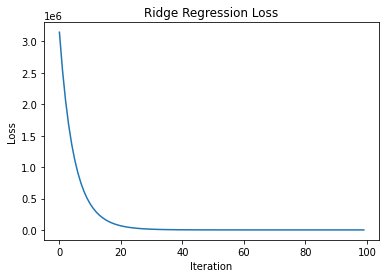

In [53]:
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Ridge Regression Loss")